# Bare bones analysis example of trisonica mini data

1. First run to convert your bag file to an hdf5 file
`python ./bag2hdf5.py FILENAME`

2. Then run the following example

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal
import scipy.interpolate
import h5py

In [2]:
def get_pandas_dataframe_from_uncooperative_hdf5(filename, key='first_key'):
    f = h5py.File(filename,'r')
    all_keys = list(f.keys())
    
    if key == 'first_key':
        print('Dataset contains these keys: ')
        print(all_keys)
        key = all_keys[0]
        print('Using only the first key: ', key)
        
    data = f[key][()]
    dic = {}
    for column_label in data.dtype.fields.keys():
        dic.setdefault(column_label, data[column_label])
    df = pandas.DataFrame(dic)
    return df

In [3]:
filename = 'data/wind.hdf5'
odorname = 'data/odor.hdf5'

In [4]:
df = get_pandas_dataframe_from_uncooperative_hdf5(filename)
of = get_pandas_dataframe_from_uncooperative_hdf5(odorname)
df

Dataset contains these keys: 
['trisonica']
Using only the first key:  trisonica
Dataset contains these keys: 
['analog_output']
Using only the first key:  analog_output


,header_seq,header_stamp_secs,header_stamp_nsecs,header_frame_id,header_stamp,speed,northsouth,westeast,updown,temperature,t_secs,t_nsecs,t
0,1,1595957763,698545932,b'',1.595958e+09,0.0,-0.33,0.14,0.27,27.049999,1595957763,698708735,1.595958e+09
1,2,1595957763,723485946,b'',1.595958e+09,0.0,-0.40,0.11,0.29,27.100000,1595957763,723678105,1.595958e+09
2,3,1595957763,748548984,b'',1.595958e+09,0.0,-0.34,0.13,0.33,27.120001,1595957763,748728556,1.595958e+09
3,4,1595957763,773571014,b'',1.595958e+09,0.0,-0.33,0.20,0.31,27.459999,1595957763,773765069,1.595958e+09
4,5,1595957763,799024105,b'',1.595958e+09,0.0,-0.21,0.18,0.33,27.780001,1595957763,799206213,1.595958e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31975,31976,1595958563,74999094,b'',1.595959e+09,0.0,0.30,0.23,0.10,27.670000,1595958563,75276819,1.595959e+09
31976,31977,1595958563,99951982,b'',1.595959e+09,0.0,-0.16,0.71,0.05,27.760000,1595958563,100227651,1.595959e+09
31977,31978,1595958563,126135110,b'',1.595959e+09,0.0,-0.17,0.82,0.07,27.200001,1595958563,126656379,1.595959e+09
31978,31979,1595958563,151091098,b'',1.595959e+09,0.0,0.10,0.50,0.29,26.940001,1595958563,151646411,1.595959e+09


In [5]:
of

,data,t_secs,t_nsecs,t
0,b'0.170870328002',1595957763,649663705,1.595958e+09
1,b'0.171183146304',1595957763,654564510,1.595958e+09
2,b'0.170870328002',1595957763,664562819,1.595958e+09
3,b'0.170870328002',1595957763,664617371,1.595958e+09
4,b'0.170870328002',1595957763,674436704,1.595958e+09
...,...,...,...,...
159902,b'0.132393676904',1595958563,159710667,1.595959e+09
159903,b'0.132393676904',1595958563,164688882,1.595959e+09
159904,b'0.132393676904',1595958563,169675507,1.595959e+09
159905,b'0.131768040301',1595958563,174647127,1.595959e+09


In [6]:
#converting the data type to float from string (to reduce plot data time)
of.data = of.data.astype(float)
of

,data,t_secs,t_nsecs,t
0,0.170870,1595957763,649663705,1.595958e+09
1,0.171183,1595957763,654564510,1.595958e+09
2,0.170870,1595957763,664562819,1.595958e+09
3,0.170870,1595957763,664617371,1.595958e+09
4,0.170870,1595957763,674436704,1.595958e+09
...,...,...,...,...
159902,0.132394,1595958563,159710667,1.595959e+09
159903,0.132394,1595958563,164688882,1.595959e+09
159904,0.132394,1595958563,169675507,1.595959e+09
159905,0.131768,1595958563,174647127,1.595959e+09


# Plot 3D wind

Text(0.5, 0, 'Time, sec')

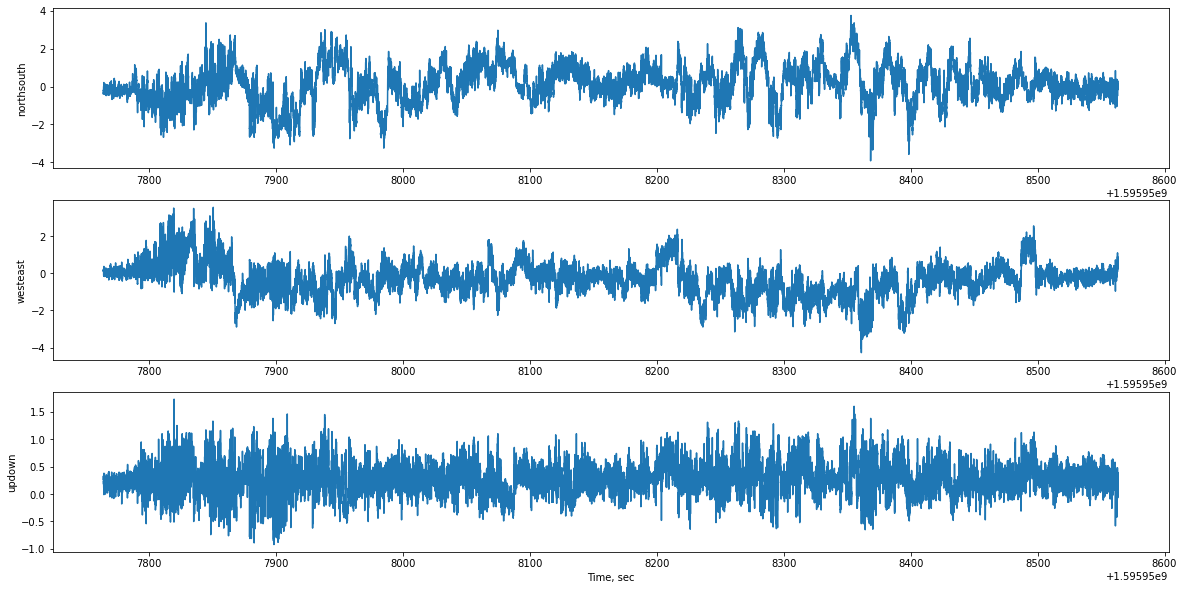

In [7]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(311)
ax1.plot(df.header_stamp, df.northsouth)
ax1.set_ylabel('northsouth')

ax2 = fig.add_subplot(312)
ax2.plot(df.header_stamp, df.westeast)
ax2.set_ylabel('westeast')

ax3 = fig.add_subplot(313)
ax3.plot(df.header_stamp, df.updown)
ax3.set_ylabel('updown')

ax3.set_xlabel('Time, sec')

Text(0, 0.5, 'Odor')

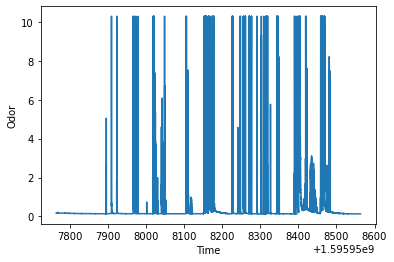

In [8]:
fig2 = plt.figure()

ox = fig2.add_subplot(111)
ox.plot(of.t, of.data)
ox.set_xlabel('Time')
ox.set_ylabel('Odor')



# Calculate turbulent intensity
https://www.cfd-online.com/Wiki/Turbulence_intensity

In [9]:
wind_3d = np.vstack((df.northsouth.values, df.westeast.values, df.updown.values))
mean_wind_3d = np.mean(np.linalg.norm(wind_3d, axis=0))
print('Mean wind speed: ', mean_wind_3d)

Mean wind speed:  1.2634012


In [10]:
std_wind_3d = np.mean(np.std(wind_3d, axis=1))
print('Standard Deviation of wind speeds: ', std_wind_3d)

Standard Deviation of wind speeds:  0.7223802


In [11]:
turbulent_intensity = std_wind_3d / mean_wind_3d
print('Turbulent Intensity: ', turbulent_intensity)

Turbulent Intensity:  0.57177424


In [12]:
df3 = pandas.read_csv("~/data/Test_6_Bag/test_6.csv") #load_GPS_directory_to_pandas('.')

#df3
#df5

In [13]:
df3.rename(columns={'Unnamed: 0':'time'}, inplace=True)
interpolate_data=df3.interpolate()
interpolate_data.to_hdf('~/data/Test_6_Bag/data.h5', key='df3', mode='w')
df6=pandas.read_hdf('~/data/Test_6_Bag/data.h5', 'df3')
df6.columns=df6.columns.str.replace(r"/", "_")
df6

/home/flybot/anaconda3/envs/FlyDataAnalysis/lib/python3.8/site-packages/pandas/core/generic.py:2431: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['/imu/data/header/frame_id', '/ublox_gps/fix/header/frame_id',
       '/ublox_gps/fix_velocity/header/frame_id'],
      dtype='object')]

  pytables.to_hdf(


,time,_analog_output_data,_imu_data_angular_velocity_x,_imu_data_angular_velocity_y,_imu_data_angular_velocity_z,_imu_data_angular_velocity_covariance_0,_imu_data_angular_velocity_covariance_1,_imu_data_angular_velocity_covariance_2,_imu_data_angular_velocity_covariance_3,_imu_data_angular_velocity_covariance_4,...,_ublox_gps_fix_velocity_twist_covariance_6,_ublox_gps_fix_velocity_twist_covariance_7,_ublox_gps_fix_velocity_twist_covariance_8,_ublox_gps_fix_velocity_twist_covariance_9,_ublox_gps_fix_velocity_twist_twist_angular_x,_ublox_gps_fix_velocity_twist_twist_angular_y,_ublox_gps_fix_velocity_twist_twist_angular_z,_ublox_gps_fix_velocity_twist_twist_linear_x,_ublox_gps_fix_velocity_twist_twist_linear_y,_ublox_gps_fix_velocity_twist_twist_linear_z
0,1.595958e+09,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.595958e+09,0.171183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.595958e+09,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.595958e+09,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.595958e+09,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399251,1.595959e+09,0.132081,0.001968,-0.001410,0.003282,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399252,1.595959e+09,0.131768,0.002590,-0.001250,0.004460,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399253,1.595959e+09,0.131977,0.003213,-0.001091,0.005639,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399254,1.595959e+09,0.132185,0.003835,-0.000932,0.006817,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035


In [14]:
df6[df6['_imu_data_angular_velocity_x'].isnull()]

,time,_analog_output_data,_imu_data_angular_velocity_x,_imu_data_angular_velocity_y,_imu_data_angular_velocity_z,_imu_data_angular_velocity_covariance_0,_imu_data_angular_velocity_covariance_1,_imu_data_angular_velocity_covariance_2,_imu_data_angular_velocity_covariance_3,_imu_data_angular_velocity_covariance_4,...,_ublox_gps_fix_velocity_twist_covariance_6,_ublox_gps_fix_velocity_twist_covariance_7,_ublox_gps_fix_velocity_twist_covariance_8,_ublox_gps_fix_velocity_twist_covariance_9,_ublox_gps_fix_velocity_twist_twist_angular_x,_ublox_gps_fix_velocity_twist_twist_angular_y,_ublox_gps_fix_velocity_twist_twist_angular_z,_ublox_gps_fix_velocity_twist_twist_linear_x,_ublox_gps_fix_velocity_twist_twist_linear_y,_ublox_gps_fix_velocity_twist_twist_linear_z
0,1.595958e+09,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.595958e+09,0.171183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.595958e+09,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.595958e+09,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.595958e+09,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.595958e+09,0.171183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
##neglecting the first few NaN values
df6[6:399255]

,time,_analog_output_data,_imu_data_angular_velocity_x,_imu_data_angular_velocity_y,_imu_data_angular_velocity_z,_imu_data_angular_velocity_covariance_0,_imu_data_angular_velocity_covariance_1,_imu_data_angular_velocity_covariance_2,_imu_data_angular_velocity_covariance_3,_imu_data_angular_velocity_covariance_4,...,_ublox_gps_fix_velocity_twist_covariance_6,_ublox_gps_fix_velocity_twist_covariance_7,_ublox_gps_fix_velocity_twist_covariance_8,_ublox_gps_fix_velocity_twist_covariance_9,_ublox_gps_fix_velocity_twist_twist_angular_x,_ublox_gps_fix_velocity_twist_twist_angular_y,_ublox_gps_fix_velocity_twist_twist_angular_z,_ublox_gps_fix_velocity_twist_twist_linear_x,_ublox_gps_fix_velocity_twist_twist_linear_y,_ublox_gps_fix_velocity_twist_twist_linear_z
6,1.595958e+09,0.171138,0.002684,0.002392,0.004481,0.000003,0.0,0.0,0.0,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.595958e+09,0.171094,0.001364,0.002595,0.006853,0.000003,0.0,0.0,0.0,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.595958e+09,0.171049,0.000830,0.002433,-0.007356,0.000003,0.0,0.0,0.0,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.595958e+09,0.171004,-0.000293,0.003413,-0.009666,0.000003,0.0,0.0,0.0,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.595958e+09,0.170960,0.000221,0.002794,-0.013248,0.000003,0.0,0.0,0.0,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399250,1.595959e+09,0.132394,0.001933,-0.001063,-0.000827,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399251,1.595959e+09,0.132081,0.001968,-0.001410,0.003282,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399252,1.595959e+09,0.131768,0.002590,-0.001250,0.004460,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399253,1.595959e+09,0.131977,0.003213,-0.001091,0.005639,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035


Text(0.5, 0, 'Time, sec')

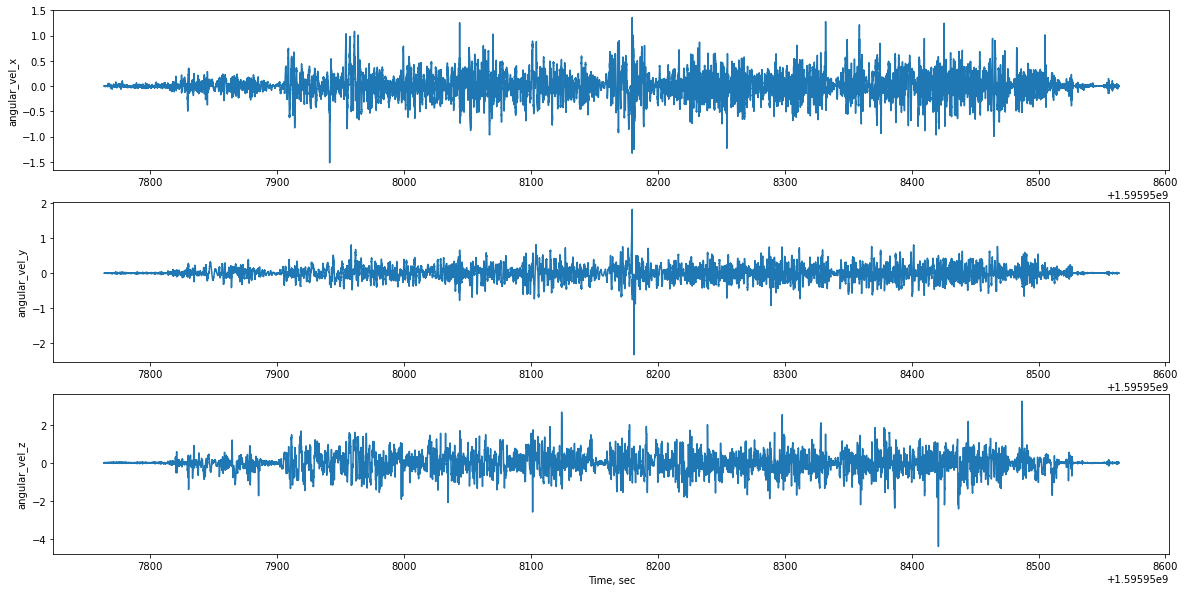

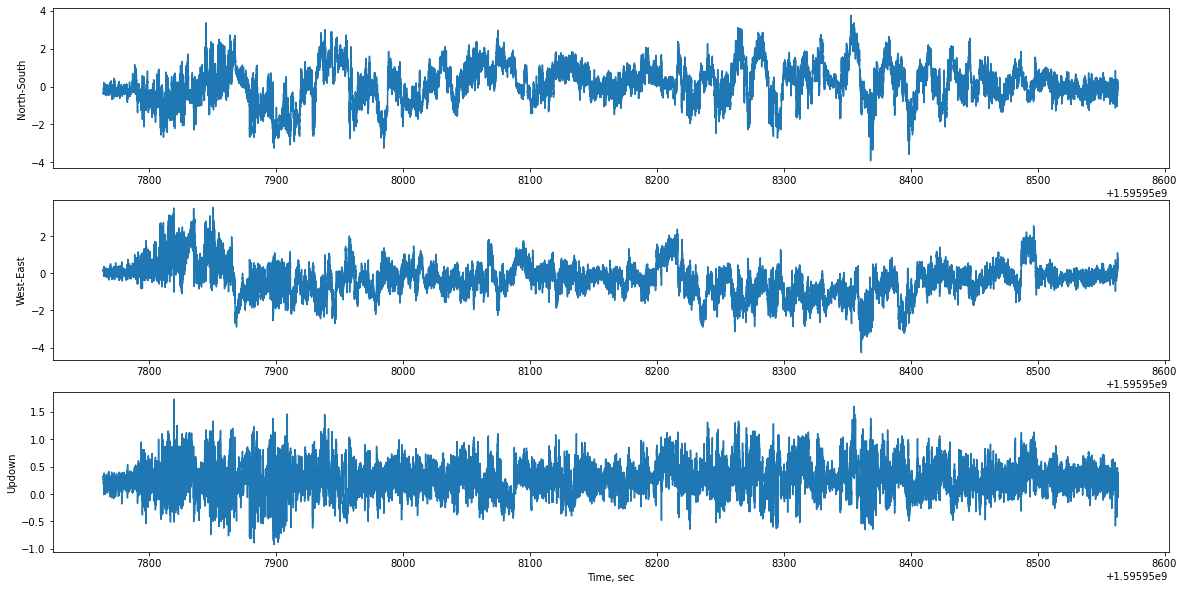

In [16]:
##plot imu angular vel
fig_imu = plt.figure(figsize=(20,10))

ax1 = fig_imu.add_subplot(311)
ax1.plot(df6.time, df6._imu_data_angular_velocity_x)
ax1.set_ylabel('angular_vel_x')

ax2 = fig_imu.add_subplot(312)
ax2.plot(df6.time, df6._imu_data_angular_velocity_y)
ax2.set_ylabel('angular_vel_y')

ax3 = fig_imu.add_subplot(313)
ax3.plot(df6.time, df6._imu_data_angular_velocity_z)
ax3.set_ylabel('angular_vel_z')


ax3.set_xlabel('Time, sec')


##plot imu angular vel
fig_wind = plt.figure(figsize=(20,10))

ax1 = fig_wind.add_subplot(311)
ax1.plot(df6.time, df6._trisonica_northsouth)
ax1.set_ylabel('North-South')

ax2 = fig_wind.add_subplot(312)
ax2.plot(df6.time, df6._trisonica_westeast)
ax2.set_ylabel('West-East')

ax3 = fig_wind.add_subplot(313)
ax3.plot(df6.time, df6._trisonica_updown)
ax3.set_ylabel('Updown')


ax3.set_xlabel('Time, sec')

Text(0, 0.5, 'Odor Concentration (voltage)')

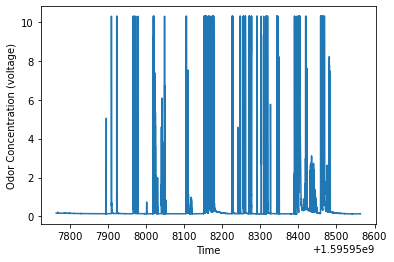

In [17]:
plt.plot(df6.time, df6._analog_output_data)
plt.xlabel("Time")
plt.ylabel("Odor Concentration (voltage)")


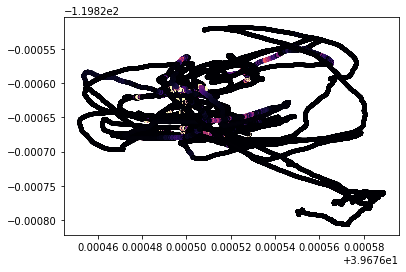

In [18]:
fig_odor_instance = plt.figure()
ax_odor_instance = fig_odor_instance.add_subplot(111)

ax_odor_instance.scatter(df6._ublox_gps_fix_latitude, df6._ublox_gps_fix_longitude, c=df6._analog_output_data, s=10, cmap='magma')